In [1]:
import os
import pandas as pd
import ROOT
from array import array
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from tableauColors import palette
from sklearn.metrics import mean_absolute_error

Welcome to JupyROOT 6.18/00


In [2]:
DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Run/final_run/tauolaevts/10000'
fileName = os.path.join(DATA_DIR, 'dftest.csv')
df = pd.read_csv(fileName)
print(df.shape)
df.head()

(4776, 14)


,eventId,clusterId,PrimaryDecayMode,VecShowerEnergy,S_sum,C_sum,S_rad_mean,C_rad_mean,S_hot,C_hot,CoverS,dist2charge,label,rec_energy
0,1,5,2,7879.859769,3277.3381,1703.1630,4.790289,4.450992,0.071445,0.078125,0.519679,0.000000,3,3882.314553
1,4,7,4,6158.922797,1632.9534,1117.7004,4.053835,3.379642,0.155019,0.111111,0.684466,0.000000,3,1830.971989
2,4,8,4,952.328476,669.6271,904.8052,1.809241,1.412096,0.137390,0.294118,1.351208,77.116415,2,579.245024
3,4,9,4,5571.902271,5284.2760,4657.0854,2.436947,1.954409,0.115486,0.154286,0.881310,95.739312,2,5525.313700
4,4,10,4,7912.217502,6711.5728,7460.2070,2.626593,2.286294,0.150647,0.127229,1.111544,69.076174,2,6423.862708


In [3]:
df.rec_energy.isna().sum()

781

In [4]:
df2 = df[~df.rec_energy.isna()]

In [5]:
np.mean(np.abs((df2.VecShowerEnergy.values - df2.rec_energy.values) / df2.VecShowerEnergy.values)) * 100

26.084170061696447

In [6]:
f = ROOT.TFile('dftest.root', 'recreate' )
t = ROOT.TTree('test', 'tree with test set' )

PrimaryDecayMode = array('i', [0])
VecShowerEnergy = array('d', [0.])
S_sum = array('d', [0.])
C_sum = array('d', [0.])
S_rad_mean = array('d', [0.])
C_rad_mean = array('d', [0.])
S_hot = array('d', [0.])
C_hot = array('d', [0.])
CoverS = array('d', [0.])
# dist2charge = array('d', [0.])
rec_energy = array('d', [0.])
label = array('i', [0])

t.Branch('PrimaryDecayMode', PrimaryDecayMode, "PrimaryDecayMode/I")
t.Branch('VecShowerEnergy', VecShowerEnergy, "VecShowerEnergy/D")
t.Branch('S_sum', S_sum, "S_sum/D")
t.Branch('C_sum', C_sum, "C_sum/D")
t.Branch('S_rad_mean', S_rad_mean, "S_rad_mean/D")
t.Branch('C_rad_mean', C_rad_mean, "C_rad_mean/D")
t.Branch('S_hot', S_hot, "S_hot/D")
t.Branch('C_hot', C_hot, "C_hot/D")
t.Branch('CoverS', CoverS, "CoverS/D")
# t.Branch('dist2charge', dist2charge, "dist2charge/D")
t.Branch('rec_energy', rec_energy, "rec_energy/D")
t.Branch('label', label, "label/I")

for i in range(df.shape[0]):
    PrimaryDecayMode[0] = df.PrimaryDecayMode.values[i] 
    VecShowerEnergy[0] = df.VecShowerEnergy.values[i]
    S_sum[0] = df.S_sum.values[i]
    C_sum[0] = df.C_sum.values[i]
    S_rad_mean[0] = df.S_rad_mean.values[i]
    C_rad_mean[0] = df.C_rad_mean.values[i]
    S_hot[0] = df.S_hot.values[i]
    C_hot[0] = df.C_hot.values[i]
    CoverS[0] = df.CoverS.values[i]
    rec_energy[0] = df.rec_energy.values[i]
#     dist2charge[0] = df.dist2charge.values[i]
    label[0] = df.label.values[i]
    t.Fill()
f.Write()
f.Close()

In [7]:
tdf = ROOT.ROOT.RDataFrame("test", "dftest.root")

In [8]:
tdf.AsNumpy()

{'PrimaryDecayMode': numpy.array([2, 4, 4, ..., 4, 4, 4], dtype=int32),
 'VecShowerEnergy': numpy.array([7879.85976894, 6158.92279682,  952.32847575, ...,
              1546.25015299, 9001.60140181, 6665.59402163]),
 'S_sum': numpy.array([3277.3381, 1632.9534,  669.6271, ..., 1110.4525, 7938.584 ,
              5854.5903]),
 'C_sum': numpy.array([1703.163 , 1117.7004,  904.8052, ...,  878.1933, 8027.928 ,
              5934.458 ]),
 'S_rad_mean': numpy.array([4.790289 , 4.053835 , 1.8092409, ..., 1.8024198, 2.2592833,
              2.362581 ]),
 'C_rad_mean': numpy.array([4.450992 , 3.379642 , 1.4120963, ..., 1.4088335, 2.1442318,
              1.9738507]),
 'S_hot': numpy.array([0.07144464, 0.15501863, 0.13738985, ..., 0.2208202 ,
              0.15578914, 0.11689573]),
 'C_hot': numpy.array([0.078125  , 0.11111111, 0.29411766, ..., 0.16161615,
              0.20110498, 0.19282511]),
 'CoverS': numpy.array([0.51967876, 0.68446558, 1.35120756, ..., 0.79084274,
              1.0112544 ,

In [36]:
tdf2 = tdf
tdf2 = tdf2.Define("percentage_error", "(VecShowerEnergy-rec_energy)/VecShowerEnergy")
tdf2 = tdf2.Filter("label == 3")

 FCN=17.791 FROM MINOS     STATUS=SUCCESSFUL    125 CALLS         461 TOTAL
                     EDM=2.77196e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.82271e+00   2.86418e-01   1.19781e-02  -5.76338e-03
   2  Mean         4.81051e-01   8.64298e-02   5.59580e-04   2.03647e-03
   3  Sigma        3.52786e-01   1.33066e-01   1.33066e-01   2.61312e-04
 FCN=45.7099 FROM MINOS     STATUS=SUCCESSFUL     84 CALLS         318 TOTAL
                     EDM=1.24532e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.42569e+00   2.60640e-01   3.85792e-03  -6.66857e-04
   2  Mean         4.97629e-01   3.42689e-02   4.67291e-05  -7.41434e-03
   3  Sigma        3.02032e-01   4

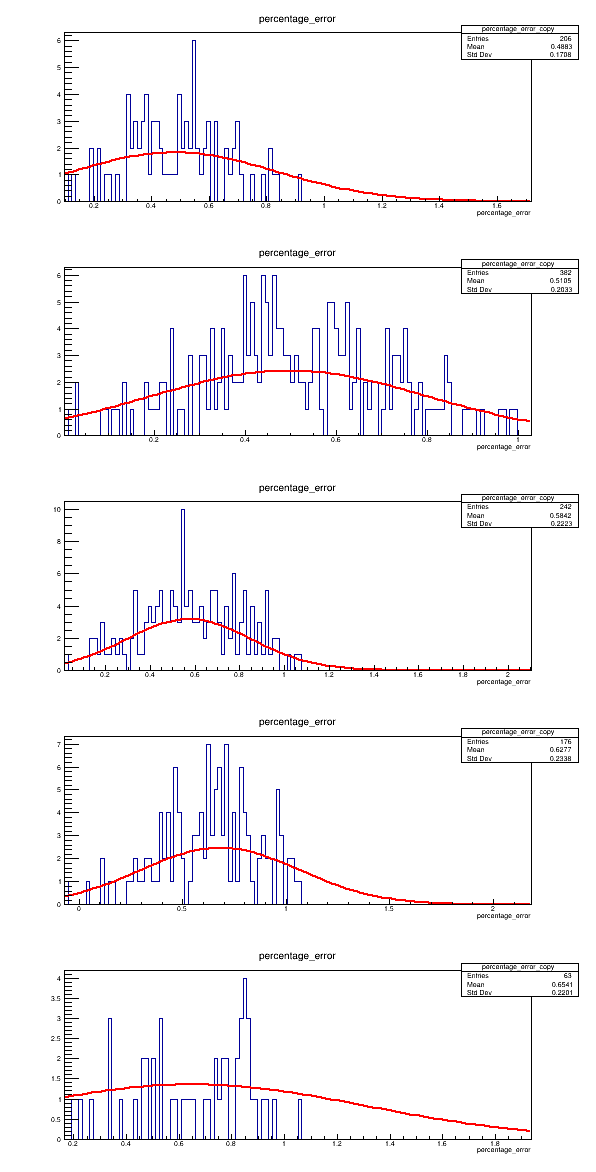

In [37]:
c1 = ROOT.TCanvas("c1", "c1", 600, 1200)
nbins = 5
c1.Divide(1,nbins)
binwidth = 10000
stdarr = []
for i in range(nbins):
    c1.cd(i+1)
    tdf3 = tdf2.Filter(f"VecShowerEnergy > {i*binwidth} and VecShowerEnergy < {(i+1)*binwidth}")
#     model = ("", "", 50, -2., 2.)
    h = tdf3.Histo1D("percentage_error")
    r = h.Fit("gaus", "SEM+")
#     r.Print()
    h.DrawCopy()
    stdarr += [r.Parameter(2) / r.Parameter(1)] #[h.GetRMS()]
c1.Draw()

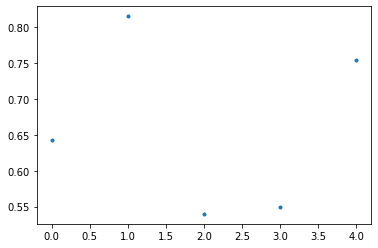

In [35]:
plt.plot(stdarr, '.')

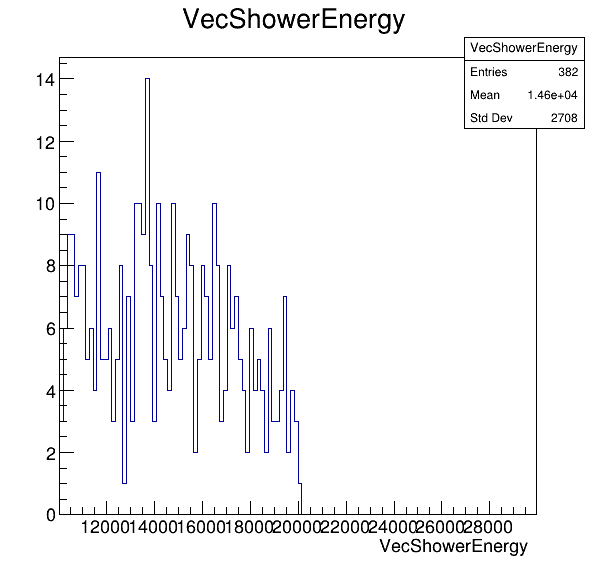

In [175]:
c2 = ROOT.TCanvas("c2", "c2", 600, 600)
# model = ("", "", 50, -2., 2.)
h2 = tdf2.Histo1D("VecShowerEnergy")
h2.Draw()
# h2.Fit("gaus")
c2.Draw()